# Sample release

This notebook serves as a basic introduction to loading and viewing data
released in associaton with the GWTC-2.1 Parameter Estimation Data Release.

The released data file can be read in using the h5py, PESummary, or astropy libraries. 
For general instructions on how to manipulate the data file and/or read this data file with h5py, see the [PESummary docs](https://lscsoft.docs.ligo.org/pesummary)

In this notebook we use as an example the event  `GW190403_051519`. All files that are part of this data release can be found through [Zenodo](https://doi.org/10.5281/zenodo.5117703).


The data release consists of two `h5` files for each event, containing posterior samples, analysis configurations and auxilliary data (Power Spectral Densities and calibration uncertainty envelopes). 
Each `h5` file contains several datasets representing the different analyses performed for the GWTC-2.1 project:
 * `C01:IMRPhenomXPHM`
 * `C01:SEOBNRv4PHM`
 * `C01:Mixed` - Containing equal numbers of samples drawn from the respective `IMRPhenomXPHM` and `SEOBNRv4PHM` analyses done for each event. If only one of `IMRPhenomXPHM` or `SEOBNRv4PHM` analyses was performed, this dataset is simply a resampling of that analysis.

The two `h5` files for each event differ in terms of the distance prior used. The `h5` files with the suffix `*_nocosmo.h5` contain samples from parameter estimation performed with a "luminosity-distance-squared" prior, while those with the `*_cosmo.h5` suffix have samples that have been reweighted to a prior corresponding to a uniform merger rate per comoving volume in the rest frame of the source. Following the discussion in the [GWTC-2.1 paper](https://dcc.ligo.org/LIGO-P2100063/public),  we use the `C01:Mixed` results with the comoving prior in this notebook.

We assume the `h5` files from the data release are in the same directory as this notebook. 

 * We do not guarantee that the data release files can be read in with other packages.

First we import the key python modules

In [1]:
import matplotlib.pyplot as plt
import pesummary
from pesummary.io import read
print(pesummary.__version__)
import h5py
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings('ignore')
from pesummary.utils.utils import logger
import logging
logger.setLevel(logging.CRITICAL)

0.13.3


**Note that for `pesummary<=0.9.1`, `seaborn<=0.10.1` is required.**

The samples for each event is stored in the corresponding `h5` file. This data file can be read either using `h5py` or  using in using the `pesummary` `read` function. Each analysis file will contain several datasets. For a detailed description of what the names mean, see Section V of the [GWTC-2.1 paper](https://dcc.ligo.org/LIGO-P2100063/public). Here we look at a `*_cosmo.h5` file, which contains posterior samples with a distance prior that assumes a uniform merger rate per comoving time-volume.

In [2]:
file_name = './IGWN-GWTC2p1-v2-GW190403_051519_PEDataRelease_mixed_cosmo.h5'

In [3]:
# Using h5py
with h5py.File(file_name, 'r') as f:
    print('H5 datasets:')
    print(list(f))

H5 datasets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


In [4]:
# Using pesummary
data = read(file_name)
print('Found run labels:')
print(data.labels)

Found run labels:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM']


For the remainder of the notebook, we demonstrate how to use pesummary to access and plot various aspects of the analysis.

The posterior samples can be extracted through the `samples_dict` property. These posterior samples are stored in a custom table structure. Below we load a particular dataset and show which parameters are available. For a detailed description of the meaning of most parameters, see [definition of standard parameters](https://lscsoft.docs.ligo.org/pesummary/unstable_docs/gw/parameters.html)

In [5]:
samples_dict = data.samples_dict
posterior_samples = samples_dict['C01:Mixed']

parameters = sorted(list(posterior_samples.keys()))
print(parameters)

['a_1', 'a_2', 'beta', 'chi_eff', 'chi_eff_infinity_only_prec_avg', 'chi_p', 'chi_p_2spin', 'chi_p_infinity_only_prec_avg', 'chirp_mass', 'chirp_mass_source', 'comoving_distance', 'cos_iota', 'cos_theta_jn', 'cos_tilt_1', 'cos_tilt_1_infinity_only_prec_avg', 'cos_tilt_2', 'cos_tilt_2_infinity_only_prec_avg', 'dec', 'final_mass', 'final_mass_source', 'final_spin', 'geocent_time', 'inverted_mass_ratio', 'iota', 'log_likelihood', 'luminosity_distance', 'mass_1', 'mass_1_source', 'mass_2', 'mass_2_source', 'mass_ratio', 'peak_luminosity', 'phase', 'phi_1', 'phi_12', 'phi_2', 'phi_jl', 'psi', 'psi_J', 'ra', 'radiated_energy', 'redshift', 'spin_1x', 'spin_1y', 'spin_1z', 'spin_1z_infinity_only_prec_avg', 'spin_2x', 'spin_2y', 'spin_2z', 'spin_2z_infinity_only_prec_avg', 'symmetric_mass_ratio', 'theta_jn', 'tilt_1', 'tilt_1_infinity_only_prec_avg', 'tilt_2', 'tilt_2_infinity_only_prec_avg', 'total_mass', 'total_mass_source', 'viewing_angle']


## PrecessingSpinIMRHM_comoving analysis

`pesummary` allows for the user to easily make plots. As an example, we show the posterior distribution for `chirp_mass_source` plotted as a histogram and as a KDE.

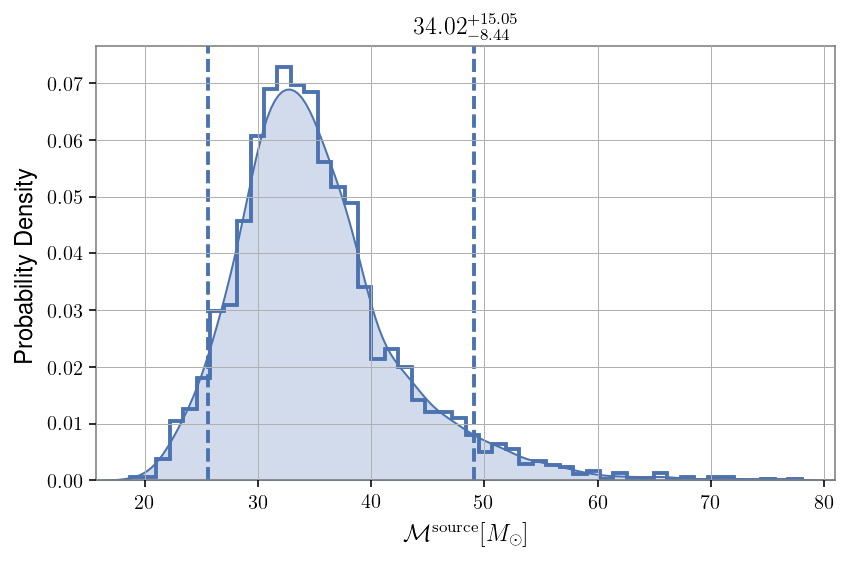

In [6]:
fig = posterior_samples.plot('chirp_mass_source', type='hist')
_ = posterior_samples.plot('chirp_mass_source', type='hist',fig=fig, kde=True)
plt.show()

We may also easily generate a spin disk, showing the most probable direction of the spin vectors, as defined at the reference frequency for this event.

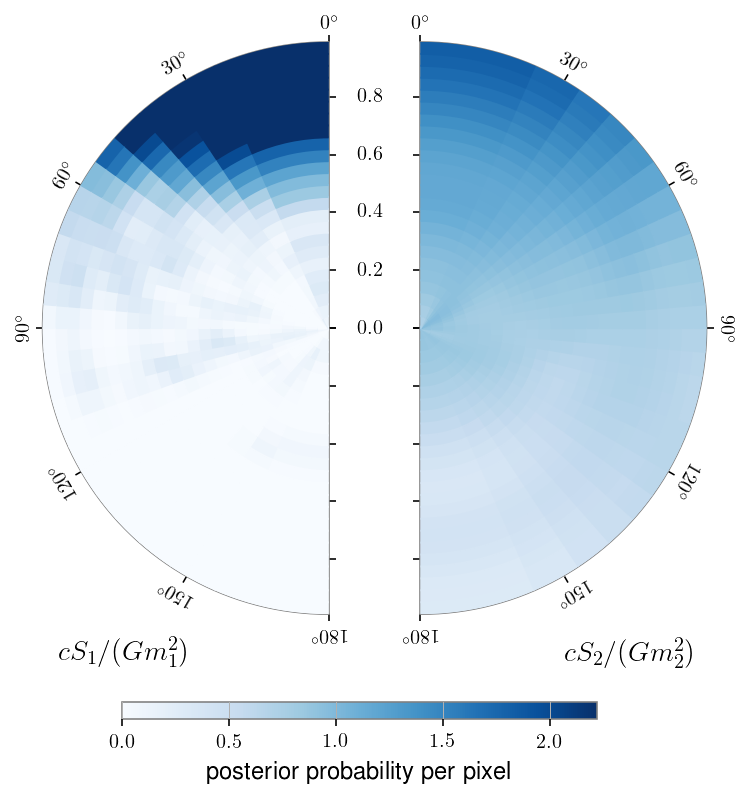

In [7]:
fig = posterior_samples.plot(type='spin_disk', colorbar=True, annotate=False,
                            show_label=True, cmap='Blues')


Corner plots are very useful for spotting degeneracies between parameters. A corner plot can easily be generated using 'pesummary'

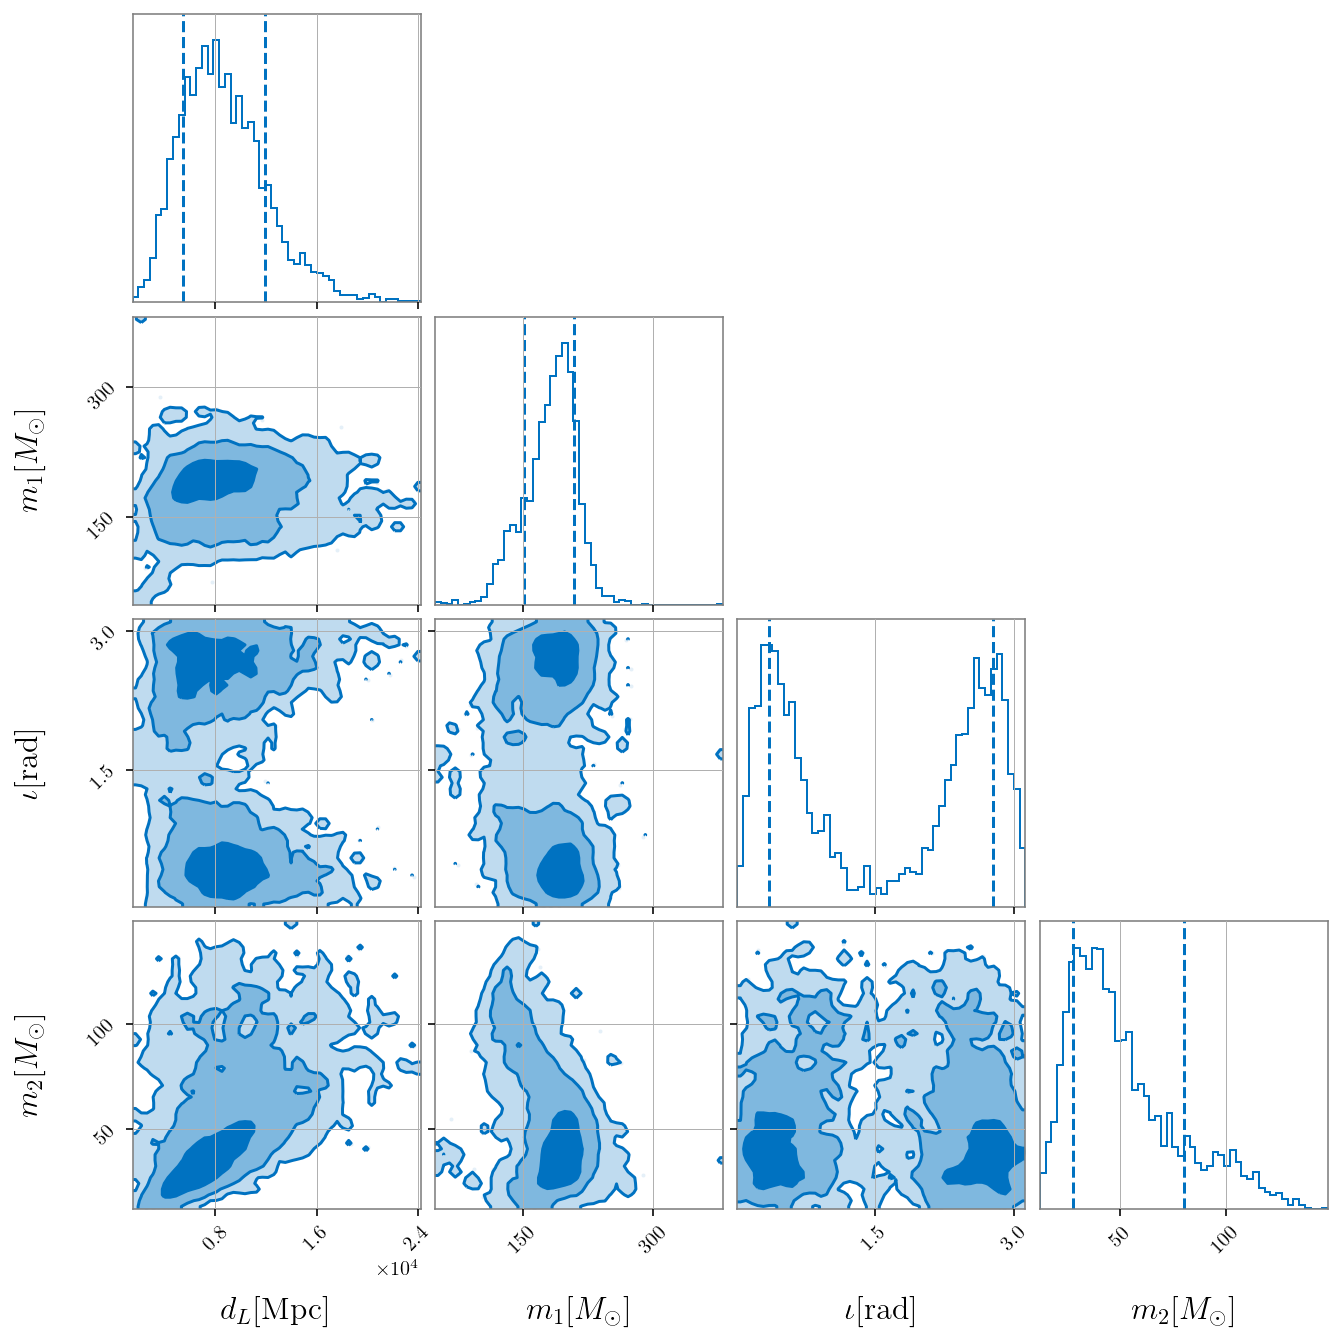

In [8]:
fig = posterior_samples.plot(type='corner',
                             parameters=['mass_1', 'mass_2', 'luminosity_distance', 'iota'])


## Comparing multiple analyses

In this example, we compare results from the 3 diffrent analyses: `IMRPhenomXPHM`,`SEOBNRv4PHM`and `Mixed` (all using their `*_cosmo` variants), where `Mixed` is an equal mixture of samples of `IMRPhenomXPHM` and `SEOBNRv4PHM`.

In [9]:
# Set a consistent color scheme
cp = ['#1b9e77','#d95f02','#7570b3']

In [10]:
labels_of_interest = ['C01:IMRPhenomXPHM', 'C01:SEOBNRv4PHM', 'C01:Mixed']

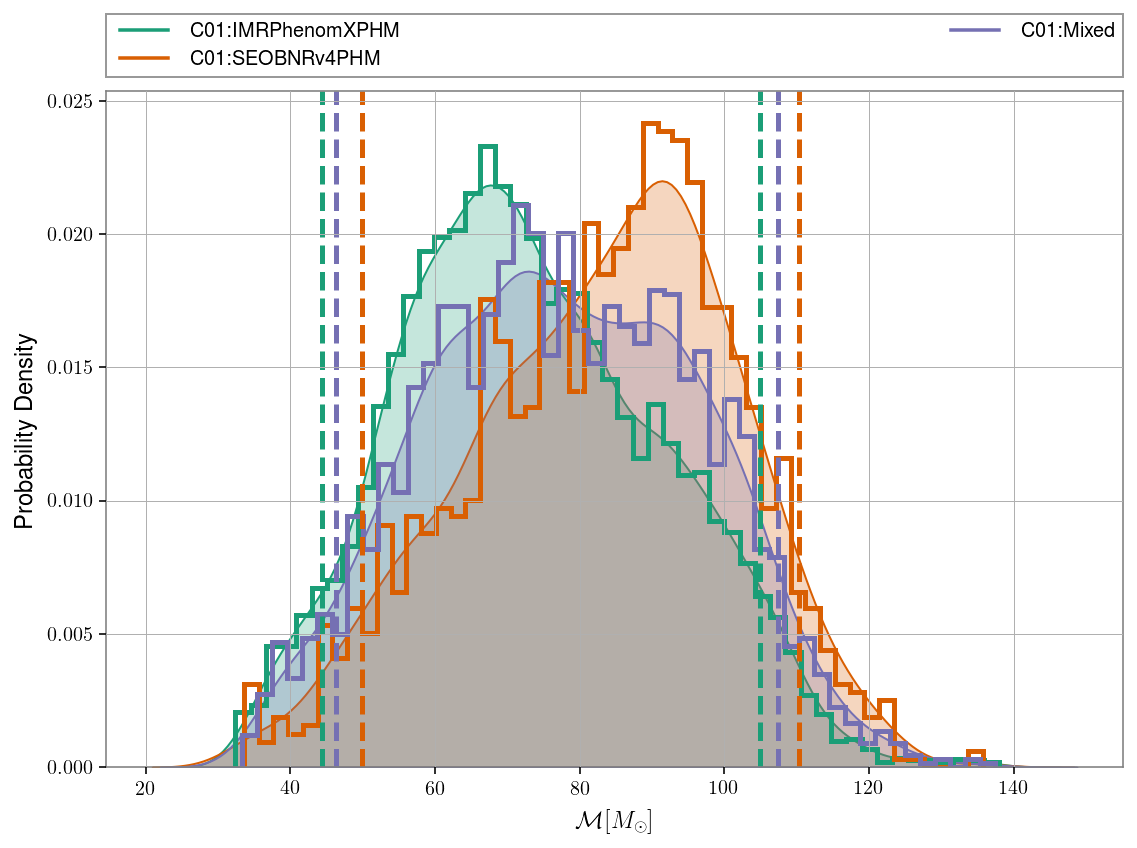

In [11]:
fig=samples_dict.plot('chirp_mass', type='hist', kde=True, labels=labels_of_interest, colors=cp) 

A comparison histogram is not the only way to display this data. We may also generate a violin plot showing the posterior distribution for each analysis

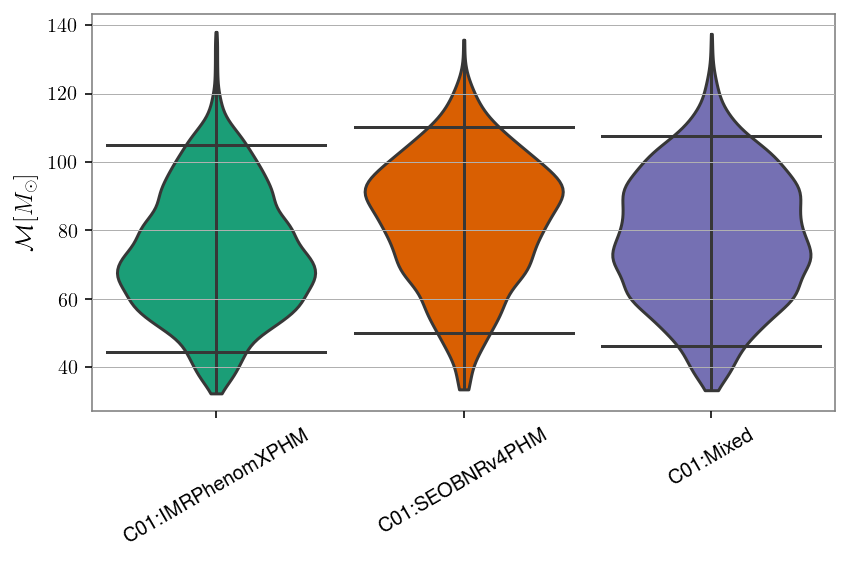

In [12]:
fig = samples_dict.plot('chirp_mass', type='violin',labels=labels_of_interest,palette=cp)


Here is an example of  generating a triangle plot:

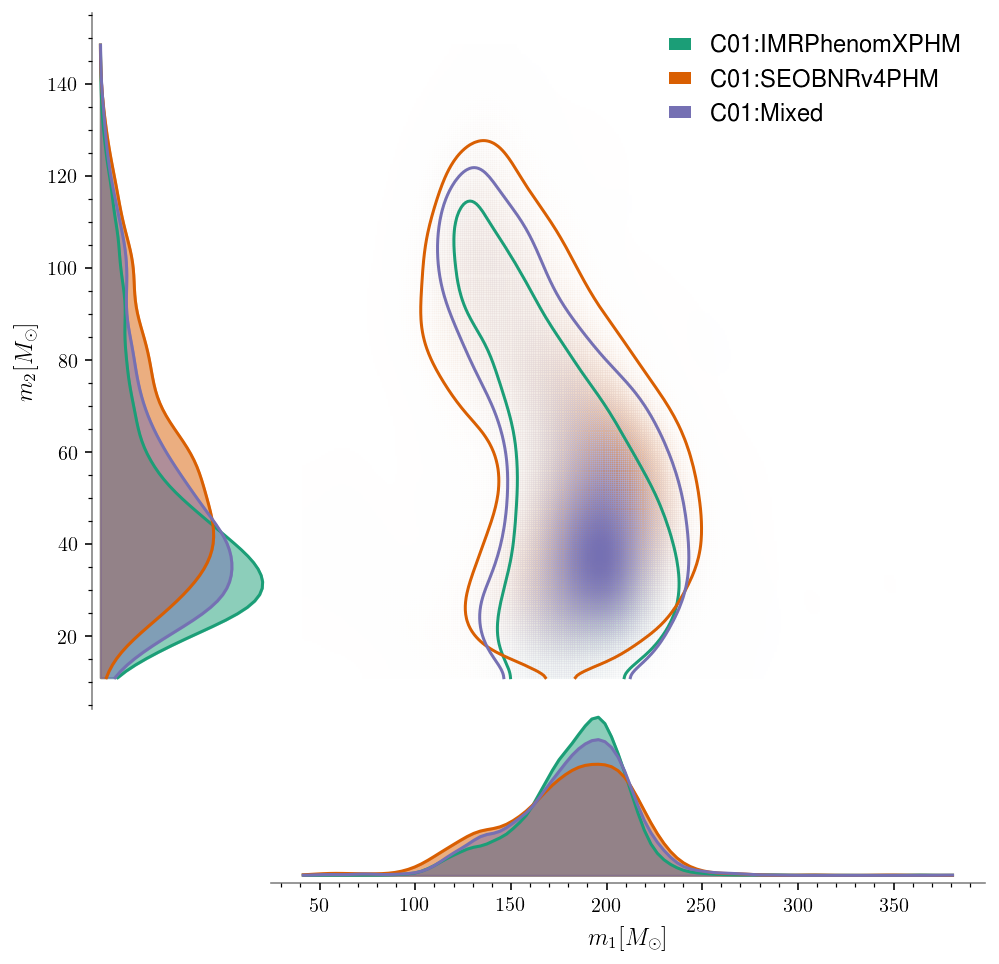

In [13]:
fig = samples_dict.plot(['mass_1', 'mass_2'], type='reverse_triangle',
                        grid=False,labels=labels_of_interest,colors=cp)

It is also useful to see how degeneracies between certain parameters change for different analysis. This can be investigated by generating a comparison corner plot

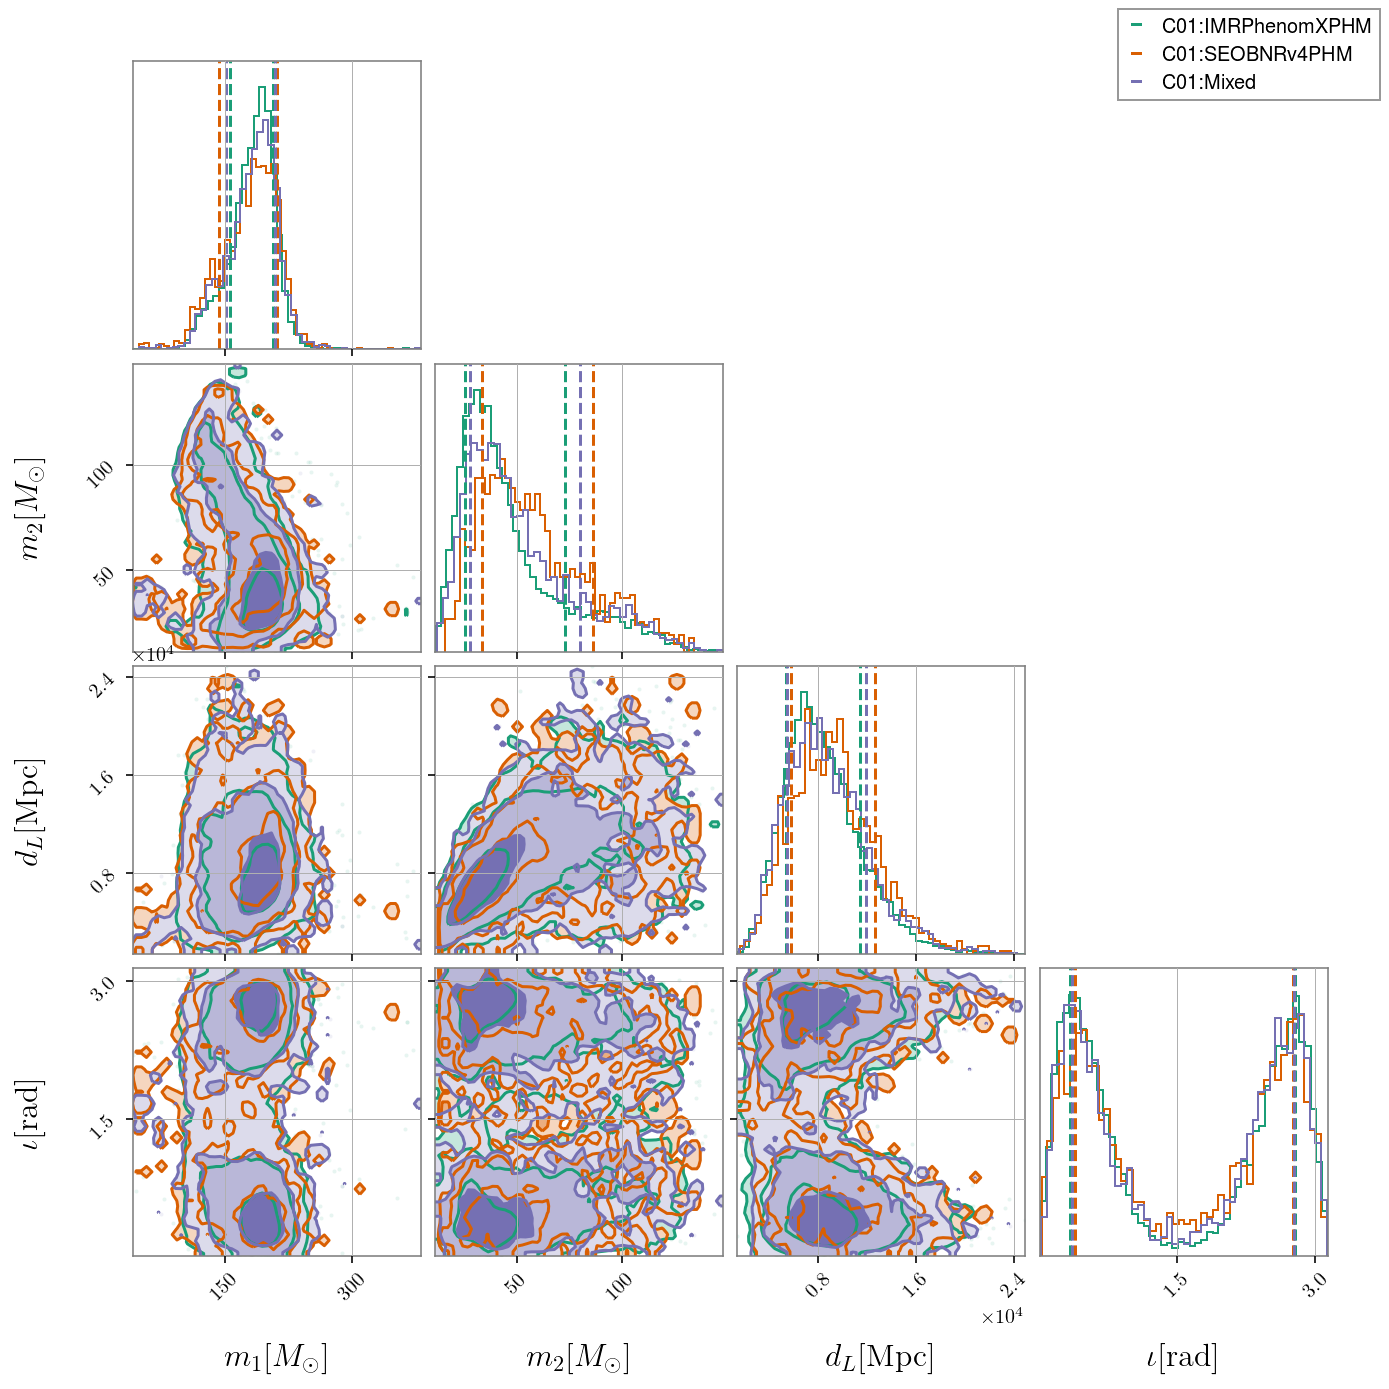

In [14]:
fig = samples_dict.plot(type='corner', 
                        parameters=['mass_1', 'mass_2', 'luminosity_distance', 'iota'],
                       labels=labels_of_interest,colors=cp
                       )

## PSD data

The 'pesummary' file also stores the PSD that was used for each analysis. This can be extracted and plotted

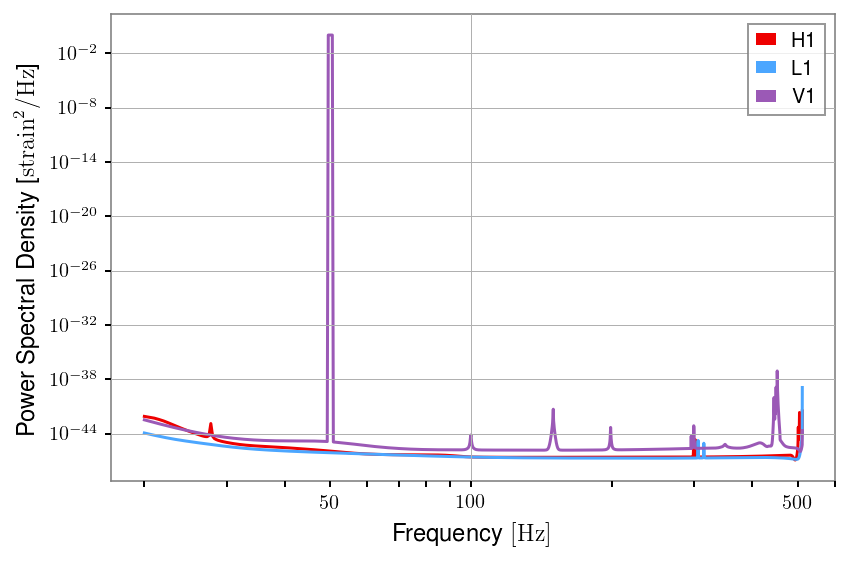

In [15]:
psd = data.psd['C01:IMRPhenomXPHM']
fig = psd.plot(fmin=20)


# Skymaps
The skymaps are stored in 2 different ways for convenience. They are available inside each `h5` result file and as separate `fits` files within the `IGWN-GWTC2p1-v2-PESkyMaps` tarball. 
The first example below shows the automatic plotting of the skymap stored inside the `h5` file. The second loads the fits file directly.
Please note that the `ligo.skymap` package is needed for plotting the skymaps in the cells below. Also note that `C01:Mixed` datasets do not have skymaps in the `h5` files, but can  be accessed via the `*Mixed.fits` files.

In [16]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt

## Using the information from h5 file

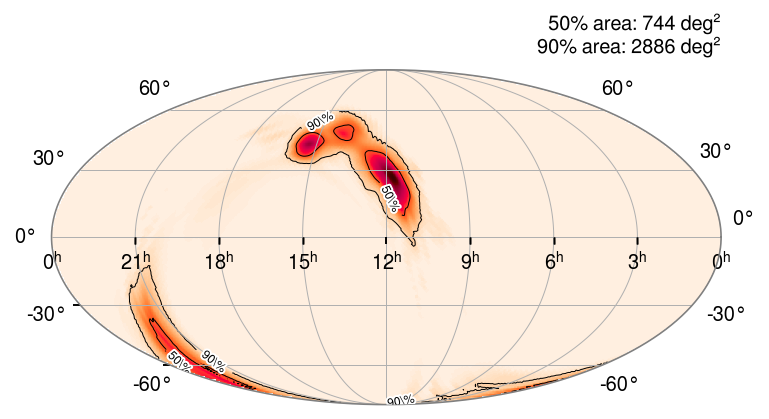

In [17]:
fig = data.skymap['C01:IMRPhenomXPHM'].plot(contour=[50, 90])

## Reading the fits file directly

In [18]:
from ligo.skymap.io import fits
from ligo.skymap import postprocess

In [19]:
fits_file = './IGWN-GWTC2p1-v2-GW190403_051519_PEDataRelease_cosmo_reweight_C01:IMRPhenomXPHM.fits'
contour_levels = [50,90]

In [20]:
skymap, metadata = fits.read_sky_map(fits_file, nest=None)
cls = 100 * postprocess.find_greedy_credible_levels(skymap)


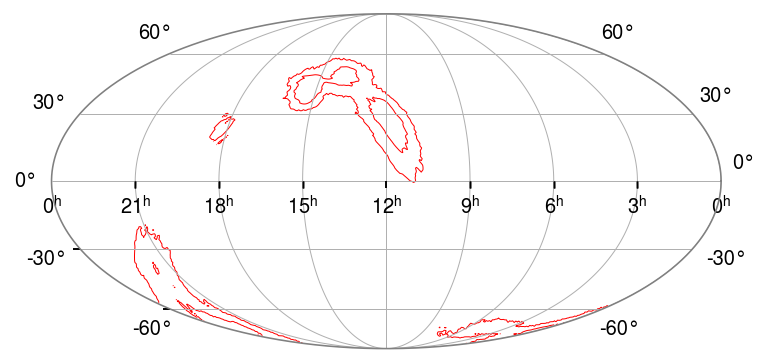

In [21]:
ax = plt.axes(projection=('astro hours mollweide'))
cs = ax.contour_hpx(
            (cls, 'ICRS'), nested=metadata['nest'],
            colors='red', linewidths=0.5, levels=contour_levels)
